In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from karateclub import DeepWalk, Walklets, HOPE, NetMF, Diff2Vec, GraRep, Node2Vec
from utils import read_data, get_cosine_sim_matrix, compute_metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import normalized_mutual_info_score
import pickle
import _pickle as cPickle
import pandas as pd
import random
from gensim.utils import simple_preprocess
from gensim.matutils import corpus2dense, corpus2csc
from sklearn.cluster import KMeans


In [2]:

def visualize_TSNE(embeddings,target):
    tsne = TSNE(n_components=2)
    data = tsne.fit_transform(embeddings)
    print(data.shape)
#     data = embeddings
    #plt.figure(figsize=(12, 6))
    plt.title("TSNE visualization of the embeddings")
    plt.scatter(data[:,0],data[:,1],c=target)

    return

In [3]:
with open('data/mendeley/preprocessed_data.pkl', 'rb') as f: #data_test_all_50 data_test_[christian_gra_med]_150.pkl data_test_all  data_test_z5_N50.pkl reuters_vectorized_data_dang.pkl
    text_corpus = pickle.load(f)

df = pd.read_excel('data/mendeley/Data.xlsx')
train_label = list(df.Y)

In [4]:
## Pick half of mendeley
total_pick = int(len(train_label)/2)
index_list = list(range(len(train_label)))
# random item from list
sample_list_idx = random.choices(train_label, k=10000)

text_corpus = [text_corpus[i] for i in sample_list_idx]
train_label = [train_label[i] for i in sample_list_idx]

In [5]:
print(len(text_corpus))
print(len(train_label))

10000
10000


In [6]:
vectorizer = TfidfVectorizer(min_df=10)
vectors = vectorizer.fit_transform(text_corpus)
print(vectors.shape)

(10000, 4005)


In [7]:
N = vectors.shape[0]
mat = kneighbors_graph(vectors, N-1, metric='cosine', mode='distance')
mat.data = 1 - mat.data  # to similarity
g = nx.from_scipy_sparse_matrix(mat, create_using=nx.Graph())

In [8]:
model = GraRep(dimensions=64, order=3)
model.fit(g)
embedding = model.get_embedding() # 192

(10000, 2)


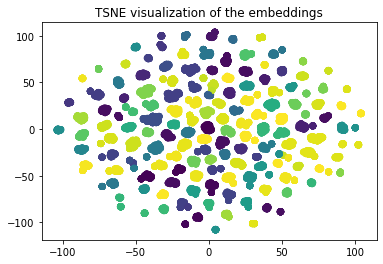

In [9]:
visualize_TSNE(embedding, train_label)

In [10]:
scaler = MinMaxScaler()
scaler.fit(embedding)
scaled_emb = scaler.transform(embedding)
f1 = compute_metrics(scaled_emb, train_label)

kmeans = KMeans(n_clusters=62, random_state=0).fit(embedding)
nmi = normalized_mutual_info_score(train_label,kmeans.labels_)

print(f1)
print(nmi)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.9784999145416657
NMI :  0.9745483931072121
None
0.8269096344822486


In [11]:
len(list(set(train_label)))

62